In [1]:
# Adapted from Chapter 7 in LDL book

In [1]:
# Using CIFAR-10 dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

170508288/170498071 [==============================] - 14s 0us/step


Category:  [8]


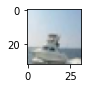

In [3]:
print('Category: ', train_labels[100])
plt.figure(figsize=(1,1))
plt.imshow(train_images[100])
plt.show()

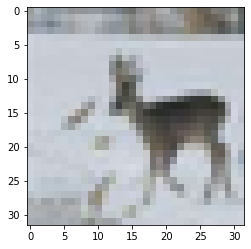

In [4]:
plt.imshow(train_images[20])


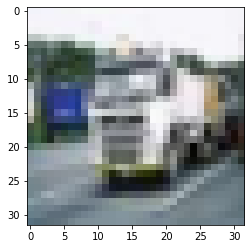

In [5]:
plt.imshow(train_images[1000])

In [6]:
train_labels.shape

(50000, 1)

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_images[100][0][0]

array([213, 229, 242], dtype=uint8)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 128
BATCH_SIZE = 32

# load the dataset
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

# standardize dataset
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev
print('mean: ', mean)
print('stddev: ', stddev)

mean:  120.70756512369792
stddev:  64.1500758911213


In [10]:
# Change labels to one-hot
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [11]:
# Model with 2 convolutional layers and 1 fully connected layers
model = Sequential()
model.add(Conv2D(64, (5,5), strides=(2,2), activation='relu', padding='same',
                 input_shape=(32,32,3), kernel_initializer='he_normal',
                 bias_initializer='zeros'))
model.add(Conv2D(64, (3,3), strides=(2,2), activation='relu', padding='same',
                 kernel_initializer='he_normal', bias_initializer='zeros'))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 82,762
Trainable params: 82,762
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=EPOCHS,
                    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Epoch 1/128
1563/1563 - 17s - loss: 1.3924 - accuracy: 0.5091 - val_loss: 1.1788 - val_accuracy: 0.5821 - 17s/epoch - 11ms/step
Epoch 2/128
1563/1563 - 7s - loss: 1.0551 - accuracy: 0.6325 - val_loss: 1.0454 - val_accuracy: 0.6364 - 7s/epoch - 4ms/step
Epoch 3/128
1563/1563 - 6s - loss: 0.9059 - accuracy: 0.6840 - val_loss: 1.0331 - val_accuracy: 0.6443 - 6s/epoch - 4ms/step
Epoch 4/128
1563/1563 - 5s - loss: 0.8080 - accuracy: 0.7176 - val_loss: 1.0165 - val_accuracy: 0.6554 - 5s/epoch - 3ms/step
Epoch 5/128
1563/1563 - 6s - loss: 0.7270 - accuracy: 0.7454 - val_loss: 1.0601 - val_accuracy: 0.6490 - 6s/epoch - 4ms/step
Epoch 6/128
1563/1563 - 6s - loss: 0.6596 - accuracy: 0.7701 - val_loss: 1.0992 - val_accuracy: 0.6549 - 6s/epoch - 4ms/step
Epoch 7/128
1563/1563 - 6s - loss: 0.5994 - accuracy: 0.7878 - val_loss: 1.1265 - val_accuracy: 0.6534 - 6s/epoch - 4ms/step
Epoch 8/128
1563/1563 - 6s - loss: 0.5533 - accuracy: 0.8039 - val_loss: 1.1868 - val_accuracy: 0.6446 - 6s/epoch - 4ms/st

In [15]:
# Above overfit so here is the improved configuration from the book

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
model2 = Sequential()
model2.add(Conv2D(64, (4,4), activation='relu', padding='same',input_shape=(32,32,3)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (2,2), activation='relu', padding='same',strides=(2,2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=2))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history2 = model2.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=EPOCHS,
                    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Epoch 1/128
1563/1563 - 10s - loss: 1.6891 - accuracy: 0.3783 - val_loss: 1.3088 - val_accuracy: 0.5314 - 10s/epoch - 6ms/step
Epoch 2/128
1563/1563 - 8s - loss: 1.3553 - accuracy: 0.5161 - val_loss: 1.1707 - val_accuracy: 0.5953 - 8s/epoch - 5ms/step
Epoch 3/128
1563/1563 - 8s - loss: 1.2152 - accuracy: 0.5711 - val_loss: 1.0572 - val_accuracy: 0.6322 - 8s/epoch - 5ms/step
Epoch 4/128
1563/1563 - 8s - loss: 1.1232 - accuracy: 0.6043 - val_loss: 0.9780 - val_accuracy: 0.6623 - 8s/epoch - 5ms/step
Epoch 5/128
1563/1563 - 8s - loss: 1.0549 - accuracy: 0.6312 - val_loss: 0.9654 - val_accuracy: 0.6689 - 8s/epoch - 5ms/step
Epoch 6/128
1563/1563 - 8s - loss: 1.0129 - accuracy: 0.6485 - val_loss: 0.9000 - val_accuracy: 0.6894 - 8s/epoch - 5ms/step
Epoch 7/128
1563/1563 - 8s - loss: 0.9683 - accuracy: 0.6600 - val_loss: 0.8640 - val_accuracy: 0.7075 - 8s/epoch - 5ms/step
Epoch 8/128
1563/1563 - 10s - loss: 0.9372 - accuracy: 0.6737 - val_loss: 0.8700 - val_accuracy: 0.7080 - 10s/epoch - 6ms/s